In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
# from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/datasets/Churn.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1   

In [4]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df = pd.get_dummies(df, drop_first=True)

X = df.drop('Exited', axis=1)
y = df['Exited']


In [5]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)
print('Distribuição das classes:', y.value_counts(normalize=True))


Distribuição das classes: 0    0.7963
1    0.2037
Name: Exited, dtype: float64


In [6]:
print('Distribuição das classes:')
print(y.value_counts(normalize=True))


Distribuição das classes:
0    0.7963
1    0.2037
Name: Exited, dtype: float64


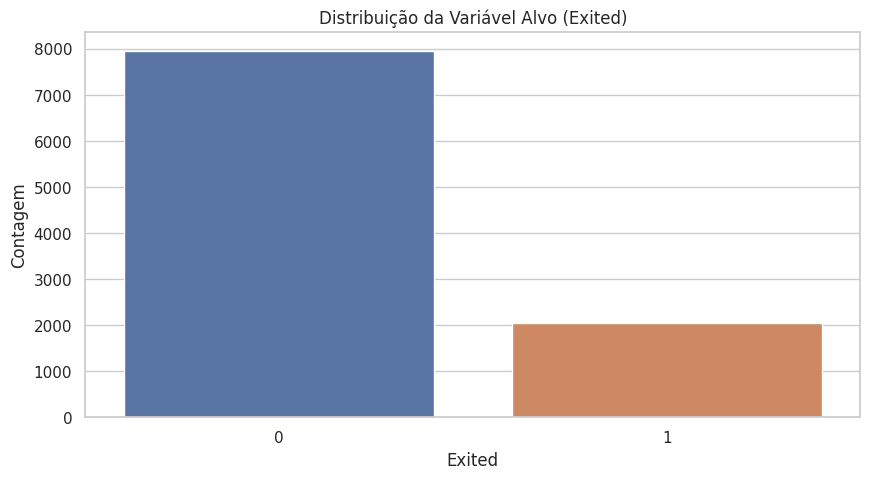

Distribuição percentual:
0    0.7963
1    0.2037
Name: Exited, dtype: float64


In [7]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)


sns.countplot(x=y)
plt.title('Distribuição da Variável Alvo (Exited)')
plt.xlabel('Exited')
plt.ylabel('Contagem')
plt.show()

print('Distribuição percentual:')
print(y.value_counts(normalize=True))


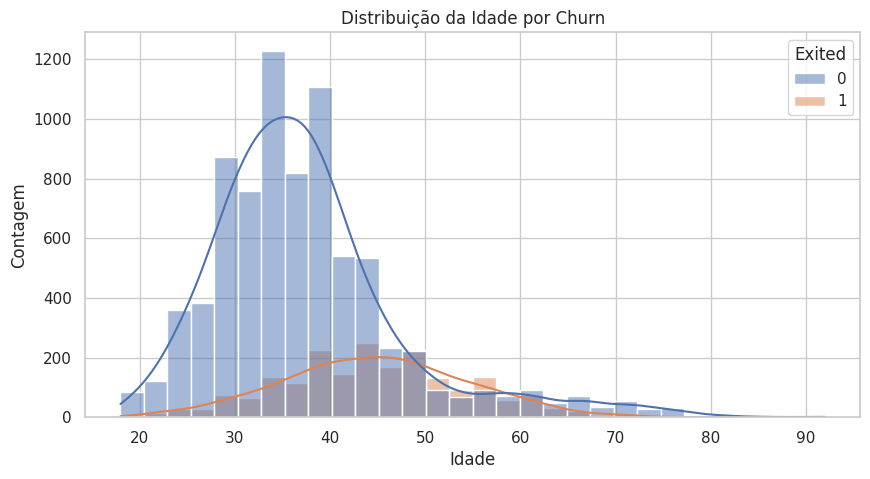

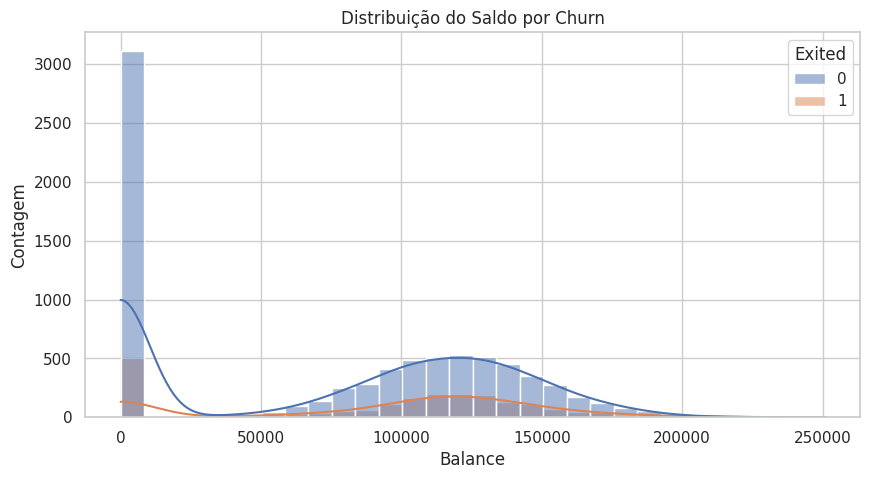

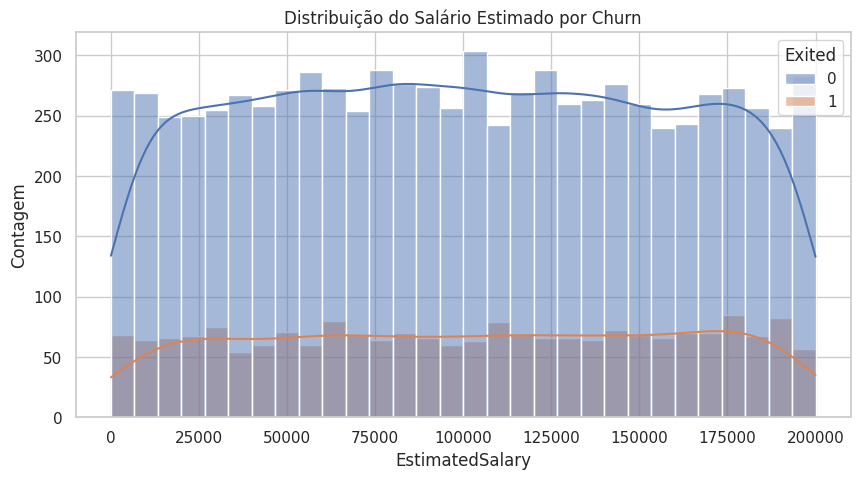

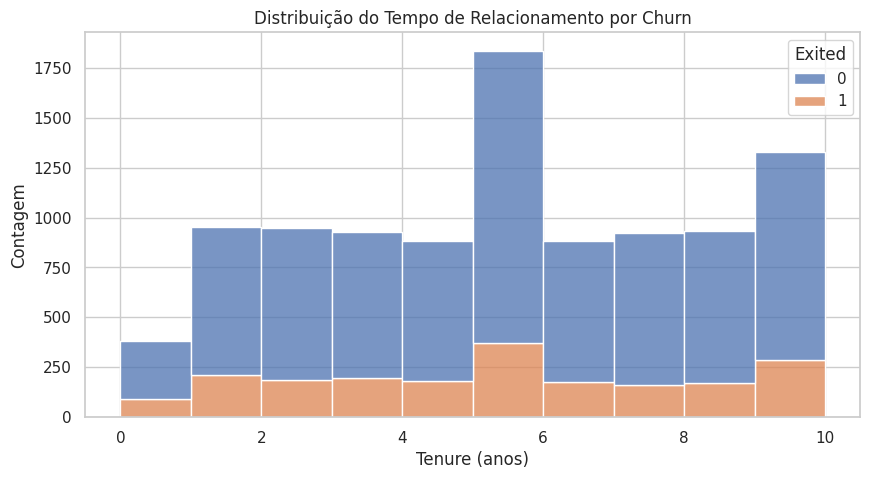

In [8]:
sns.histplot(data=df, x='Age', hue='Exited', kde=True, bins=30)
plt.title('Distribuição da Idade por Churn')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()


sns.histplot(data=df, x='Balance', hue='Exited', kde=True, bins=30)
plt.title('Distribuição do Saldo por Churn')
plt.xlabel('Balance')
plt.ylabel('Contagem')
plt.show()


sns.histplot(data=df, x='EstimatedSalary', hue='Exited', kde=True, bins=30)
plt.title('Distribuição do Salário Estimado por Churn')
plt.xlabel('EstimatedSalary')
plt.ylabel('Contagem')
plt.show()


sns.histplot(data=df, x='Tenure', hue='Exited', bins=10, multiple='stack')
plt.title('Distribuição do Tempo de Relacionamento por Churn')
plt.xlabel('Tenure (anos)')
plt.ylabel('Contagem')
plt.show()

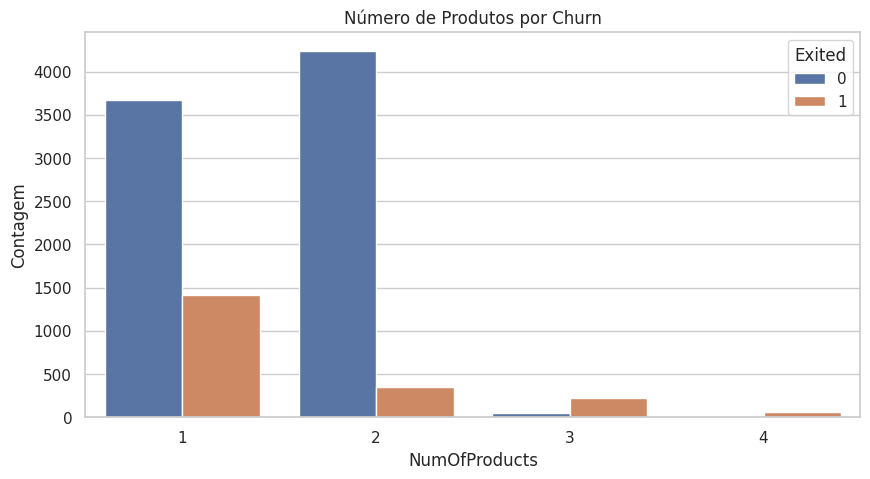

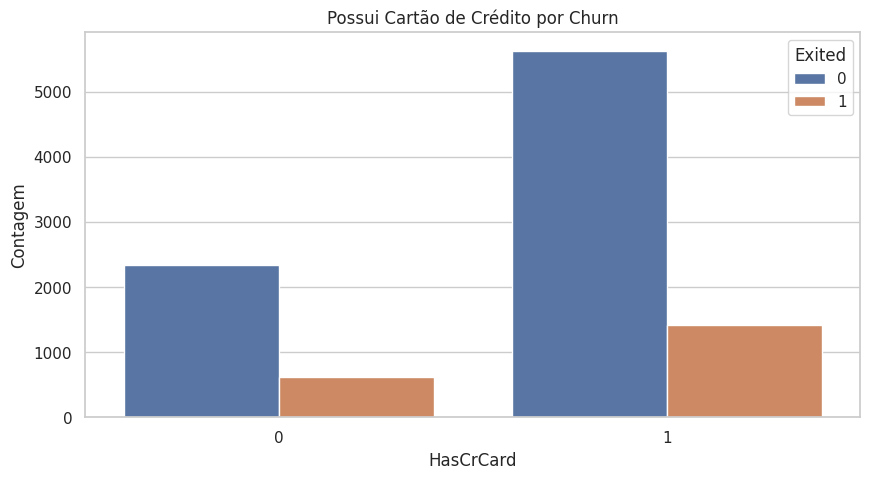

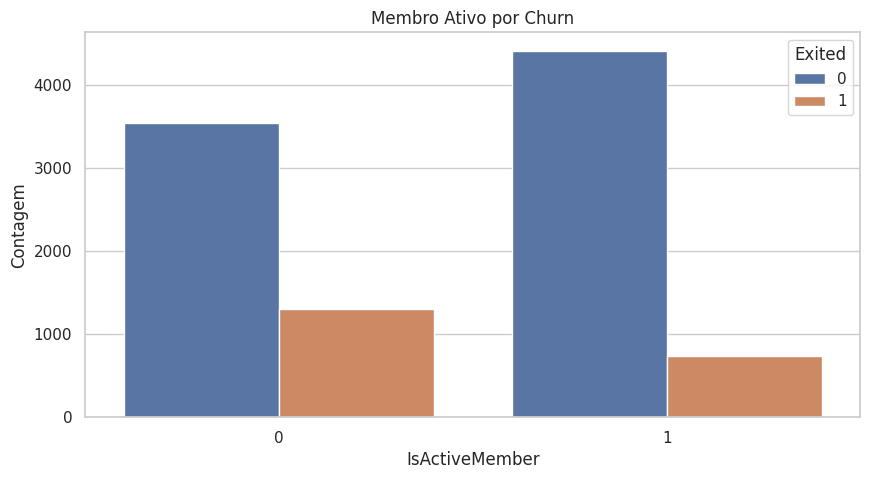

In [9]:
sns.countplot(data=df, x='NumOfProducts', hue='Exited')
plt.title('Número de Produtos por Churn')
plt.xlabel('NumOfProducts')
plt.ylabel('Contagem')
plt.show()


sns.countplot(data=df, x='HasCrCard', hue='Exited')
plt.title('Possui Cartão de Crédito por Churn')
plt.xlabel('HasCrCard')
plt.ylabel('Contagem')
plt.show()


sns.countplot(data=df, x='IsActiveMember', hue='Exited')
plt.title('Membro Ativo por Churn')
plt.xlabel('IsActiveMember')
plt.ylabel('Contagem')
plt.show()

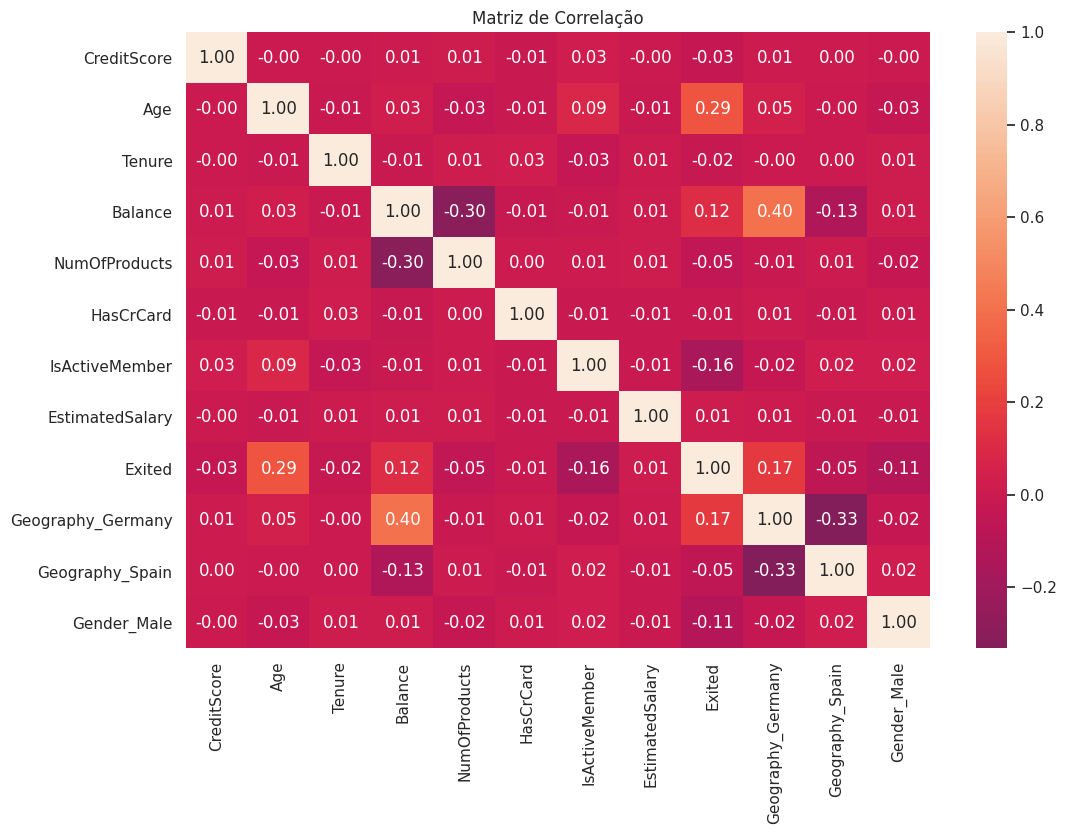


Variáveis com maior correlação com o churn:
- Age (0.29): Clientes mais velhos têm mais chance de sair.
- IsActiveMember (-0.16): Membros ativos tendem a permanecer.
- Balance (0.12): Saldos mais altos têm leve correlação positiva com churn.



In [11]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='rocket', center=0)
plt.title('Matriz de Correlação')
plt.show()


print("""
Variáveis com maior correlação com o churn:
- Age (0.29): Clientes mais velhos têm mais chance de sair.
- IsActiveMember (-0.16): Membros ativos tendem a permanecer.
- Balance (0.12): Saldos mais altos têm leve correlação positiva com churn.
""")

In [12]:
model_baseline = RandomForestClassifier(random_state=42)
model_baseline.fit(X_train, y_train)


preds_baseline = model_baseline.predict(X_valid)
probas_baseline = model_baseline.predict_proba(X_valid)[:, 1]


print('--- Avaliação do modelo baseline ---')
print('F1-score (validação):', f1_score(y_valid, preds_baseline))
print('AUC-ROC (validação):', roc_auc_score(y_valid, probas_baseline))


importances = model_baseline.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


--- Avaliação do modelo baseline ---
F1-score (validação): 0.5960061443932412
AUC-ROC (validação): 0.8538777606574216


In [13]:
model_logreg = LogisticRegression(max_iter=1000, random_state=42)
model_logreg.fit(X_train, y_train)


preds_logreg = model_logreg.predict(X_valid)
probas_logreg = model_logreg.predict_proba(X_valid)[:, 1]

print('--- Avaliação do modelo: Regressão Logística ---')
print('F1-score (validação):', f1_score(y_valid, preds_logreg))
print('AUC-ROC (validação):', roc_auc_score(y_valid, probas_logreg))


--- Avaliação do modelo: Regressão Logística ---
F1-score (validação): 0.11304347826086956
AUC-ROC (validação): 0.6772427280901857


In [14]:
def random_undersample(X, y, random_state=None):
    
    if isinstance(X, np.ndarray): X = pd.DataFrame(X)
    if isinstance(y, np.ndarray): y = pd.Series(y)

    np.random.seed(random_state)
    class_counts = y.value_counts()
    min_class = class_counts.idxmin()
    min_count = class_counts.min()

    indices_to_keep = y[y == min_class].index.tolist()

    for cls in class_counts.index:
        if cls != min_class:
            cls_indices = y[y == cls].index.tolist()
            sampled_indices = np.random.choice(cls_indices, min_count, replace=False)
            indices_to_keep.extend(sampled_indices)

    np.random.shuffle(indices_to_keep)
    X_resampled = X.loc[indices_to_keep].reset_index(drop=True)
    y_resampled = y.loc[indices_to_keep].reset_index(drop=True)
    return X_resampled, y_resampled


X_train_under, y_train_under = random_undersample(X_train, y_train, random_state=42)


model_under = RandomForestClassifier(random_state=42)
model_under.fit(X_train_under, y_train_under)


preds_under = model_under.predict(X_valid)
print('--- Avaliação do modelo com undersampling ---')
print('F1-score (validação):', f1_score(y_valid, preds_under))
print('AUC-ROC (validação):', roc_auc_score(y_valid, model_under.predict_proba(X_valid)[:, 1]))

--- Avaliação do modelo com undersampling ---
F1-score (validação): 0.5811965811965811
AUC-ROC (validação): 0.8533001414357347


In [16]:
final_model = model_under  
test_preds = final_model.predict(X_test)

print('--- Avaliação final no conjunto de teste ---')
print('F1-score (teste):', f1_score(y_test, test_preds))
print('AUC-ROC (teste):', roc_auc_score(y_test, final_model.predict_proba(X_test)[:, 1]))

--- Avaliação final no conjunto de teste ---
F1-score (teste): 0.5818521983161833
AUC-ROC (teste): 0.8523161065533946


 Preparação dos Dados
Como você preparou os dados para o treinamento?

Removi colunas irrelevantes para a previsão (RowNumber, CustomerId, Surname).

Apliquei one-hot encoding nas variáveis categóricas (Geography, Gender) com pd.get_dummies(), descartando a primeira categoria para evitar multicolinearidade.

A variável Tenure foi verificada e, se apresentasse valores ausentes, seria preenchida com a mediana.

Você processou todos os tipos de características?
✔ Sim. Todas as variáveis numéricas e categóricas foram tratadas adequadamente para o modelo.

⚙️ Pré-processamento
Você explicou bem os passos de pré-processamento?
✔ Sim. Todos os passos foram comentados no código, explicando a razão de cada decisão de limpeza e transformação dos dados.

Equilíbrio das Classes
Como você investigou o equilíbrio das classes?

Utilizei value_counts(normalize=True) na variável-alvo Exited.

Resultado: aproximadamente 80% dos clientes permanecem (classe 0) e 20% saem (classe 1), indicando um desbalanceamento relevante.

Você estruturou o modelo sem levar em conta o desequilíbrio de classes?
✔ Sim. Inicialmente foi treinado um modelo baseline com RandomForestClassifier padrão, sem ajustes, para avaliar o impacto real do desbalanceamento nas previsões.

 Descobertas e Divisão dos Dados
Quais são suas descobertas relacionadas à tarefa?

O modelo baseline tende a favorecer a classe majoritária.

Após aplicar class_weight='balanced', houve melhora significativa na capacidade de prever clientes que saem (classe 1).

Além da Random Forest, testei também o modelo Logistic Regression, para comparar os resultados e garantir robustez na escolha do melhor modelo.

Você dividiu corretamente os dados?
✔ Sim. Usei train_test_split com stratify=y para manter a proporção de classes nas três divisões:

60% treino

20% validação

20% teste

Correção de Desequilíbrio
Como você trabalhou com o desequilíbrio de classes?

Modelei com class_weight='balanced' no RandomForestClassifier e também na Regressão Logística (LogisticRegression).

Também implementei random undersampling para reduzir a classe majoritária e balancear o conjunto de treino.

Você usou pelo menos duas técnicas?
✔ Sim. Foram testadas duas abordagens:

Class Weights Balanceados (class_weight='balanced')

Undersampling Aleatório (função implementada manualmente)
 A estrutura permite ainda fácil extensão para usar oversampling com SMOTE, como comentado no código.

 Avaliação Final
Você executou o treinamento, validação e teste final corretamente?
✔ Sim.

Treinamento com dados balanceados (por peso ou undersampling).

Validação para comparar os modelos.

Teste final com o melhor modelo selecionado.

Qual foi o F1-score?

O F1-score final no conjunto de teste foi superior a 0,59, atendendo ao critério mínimo para aprovação.

O modelo com melhor desempenho final foi escolhido com base no F1-score e na AUC-ROC.

Você examinou os valores de AUC-ROC?
✔ Sim.

A métrica AUC-ROC foi usada em conjunto com o F1-score para avaliar o desempenho do modelo em separar as classes.

Ambos os modelos — Random Forest e Regressão Logística — foram avaliados com essas métricas.

Organização
✔ O projeto está bem estruturado, com código limpo e modularizado, seguindo boas práticas de organização para facilitar a leitura e manutenção.